# Purposes of this document


# ideas

In [1]:
import numpy as np
from pprint import pprint
mean_firing_rate_low = 60
mean_firing_rate_high = np.arange(60, 170, 20)

num_signal_levels = len(mean_firing_rate_high)

signal_labels = [f'{s:.2f}' for s in mean_firing_rate_high]

print(mean_firing_rate_high)
print(num_signal_levels)

[ 60  80 100 120 140 160]
6


# Experimental setup related to the questions

this part should be configured to directly test the hypothesis put forward in the previous section


In [2]:
import numpy as np
np.set_printoptions(precision=2, suppress=True)



noise_mode = 'fixed_gaussian'
fixed_noise_level = 3 #Hz

In [3]:


neuron_types = ['noisy', 'non_noisy']

n_neurons = 32
n_neurons_noisy_group = 24
n_neurons_no_noise_group = 8


noise_neuron_ind = np.arange(n_neurons_noisy_group)
no_noise_neuron_ind = np.arange(n_neurons_noisy_group, n_neurons_noisy_group + n_neurons_no_noise_group)

neuron_type_indices_in_a_list = [
    noise_neuron_ind, 
    no_noise_neuron_ind
]


noise_neuron_list = np.full(n_neurons, False, dtype = bool)
no_noise_neuron_list = np.full(n_neurons, False, dtype = bool)


noise_neuron_list[noise_neuron_ind] = True
no_noise_neuron_list[no_noise_neuron_ind] = True



neuron_type_bool_list = [
    noise_neuron_list,
    no_noise_neuron_list,
]

N_TYPES_OF_NEURONS = 2

print('We have two types of indices: ')
for t,l in enumerate(neuron_type_indices_in_a_list): print(f'{neuron_types[t]}:{l}')


We have two types of indices: 
noisy:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
non_noisy:[24 25 26 27 28 29 30 31]


In [4]:
percent_of_count = np.ones(n_neurons)[:, np.newaxis]
print(f'set up the variances in a list:')

percent_of_count[noise_neuron_ind] =  1
percent_of_count[no_noise_neuron_ind] = 1

print(f'we therefore know the number of neurons to be {n_neurons}')
print(percent_of_count)

set up the variances in a list:
we therefore know the number of neurons to be 32
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [5]:
# make percent of count into a list 
percent_of_count_in_a_list = list()

for i in range(num_signal_levels):
    percent_of_count = np.ones(n_neurons)[:, np.newaxis]

    percent_of_count[noise_neuron_ind] = 1
    percent_of_count[no_noise_neuron_ind] = 1
    
    percent_of_count_in_a_list.append(percent_of_count)

    
print(percent_of_count_in_a_list)

[array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]]), array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]]), array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       

In [6]:
exp_conds = [f'w/o FS {s}' for s in mean_firing_rate_high]

In [7]:
# CHANGE: game mechanics: generate task params
N_TARGETS = 8
N_TRIALS = 2000

NUM_EXP = len(exp_conds) # how many experiments we are running. 

# Config the experiments

this section largely copyied and pasted from   
bmi3d-sijia(branch)-bulti_in_experiemnts
https://github.com/sijia66/brain-python-interface/blob/master/built_in_tasks/sim_task_KF.py

## load dependant libraries

In [8]:
GLOBAL_FIGURE_VERTICAL_SIZE = 4

In [9]:
# import libraries
# make sure these directories are in the python path., 
from bmimultitasks import SimBMIControlMulti, SimBMICosEncKFDec, BMIControlMultiNoWindow
from features import SaveHDF
from features.simulation_features import get_enc_setup, SimKFDecoderRandom,SimIntentionLQRController, SimClockTick
from features.simulation_features import SimHDF, SimTime

from riglib import experiment

from riglib.stereo_opengl.window import FakeWindow
from riglib.bmi import train


from behaviour_metrics import  filter_state, sort_trials

from weights import calc_p_values_for_spike_batches_use_intended_kin
from weights import calc_single_batch_p_values_by_fitting_kinematics_to_spike_counts
import weights

import time
import copy
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import itertools #for identical sequences

np.set_printoptions(precision=2, suppress=True)


/home/sijia-aw/BMi3D_my/lab_bmi3d/riglib/blackrock/cerelink.py:13: UserWarning: Unable to import cerebus library. Check if is installed if using the Blackrock NeuroPort system
  warnings.warn("Unable to import cerebus library. Check if is installed if using the Blackrock NeuroPort system")


##  behaviour and task setup

In [10]:
seq = SimBMIControlMulti.sim_target_seq_generator_multi(
N_TARGETS, N_TRIALS)

#create a second version of the tasks
seqs = itertools.tee(seq, NUM_EXP + 1)
target_seq = list(seqs[NUM_EXP])

seqs = seqs[:NUM_EXP]


SAVE_HDF = False
SAVE_SIM_HDF = True #this makes the task data available as exp.task_data_hist
DEBUG_FEATURE = False


#base_class = SimBMIControlMulti
base_class = BMIControlMultiNoWindow

#for adding experimental features such as encoder, decoder
feats = []
feats_2 = []
feats_set = [] # this is a going to be a list of lists 

In [11]:
from simulation_features import TimeCountDown

feats.append(TimeCountDown)


total_exp_time = 1200# in seconds

## encoder

the cosine tuned encoder uses a poisson process, right
https://en.wikipedia.org/wiki/Poisson_distribution
so if the lambda is 1, then it's very likely 

In [12]:
from features.simulation_features import get_enc_setup

ENCODER_TYPE = 'cosine_tuned_encoder_with_poisson_noise'

#neuron set up : 'std (20 neurons)' or 'toy (4 neurons)' 
N_NEURONS, N_STATES, sim_C = get_enc_setup(sim_mode = 'rot_90', n_neurons= n_neurons)


#multiply our the neurons
sim_C_all = list()
for i in range(num_signal_levels):
    sim_C_temp = np.copy(sim_C)

    sim_C_temp[noise_neuron_list,:] = sim_C_temp[noise_neuron_list,:] * mean_firing_rate_low
    sim_C_temp[no_noise_neuron_list,:] = sim_C_temp[no_noise_neuron_list,:] * mean_firing_rate_high[i]
    
    sim_C_all.append(np.copy(sim_C_temp))

print(sim_C_all)

#set up intention feedbackcontroller
#this ideally set before the encoder


#set up the encoder
from features.simulation_features import SimCosineTunedEncWithNoise
feats.append(SimIntentionLQRController)
feats.append(SimCosineTunedEncWithNoise)


features.simulation_features: get_enc_setup has a tuning_level of 1 

[array([[  0.,   0.,   0.,  60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
       [  0.,   0.,   0., -60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
       [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
       [  0.,   0.,   0., -60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
       [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
       [  0.,   0.,   0., -60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
       [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
       [  0.,   0.,   0., -60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
       [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
       [  0

## decoder setup

In [13]:
#clda on random 
DECODER_MODE = 'random' # random 

   #take care the decoder setup
if DECODER_MODE == 'random':
    feats.append(SimKFDecoderRandom)
    #feats_2.append(SimKFDecoderRandom)
    print(f'{__name__}: set base class ')
    print(f'{__name__}: selected SimKFDecoderRandom \n')
else: #defaul to a cosEnc and a pre-traind KF DEC
    from features.simulation_features import SimKFDecoderSup
    feats.append(SimKFDecoderSup)
    #feats_2.append(SimKFDecoderRandom)
    print(f'{__name__}: set decoder to SimKFDecoderSup\n')

__main__: set base class 
__main__: selected SimKFDecoderRandom 



##  clda: learner and updater

In [14]:

#setting clda parameters 
##learner: collects paird data at batch_sizes
RHO = 0.1
batch_size = 100


#learner and updater: actualy set up rho
UPDATER_BATCH_TIME = 1
UPDATER_HALF_LIFE = np.log(RHO)  * UPDATER_BATCH_TIME / np.log(0.5)



LEARNER_TYPE = 'feedback' # to dumb or not dumb it is a question 'feedback'
UPDATER_TYPE = 'smooth_batch' #none or "smooth_batch"


#you know what? 
#learner only collects firing rates labeled with estimated estimates
#we would also need to use the labeled data
#now, we can set up a dumb/or not-dumb learner
if LEARNER_TYPE == 'feedback':
    from features.simulation_features import SimFeedbackLearner
    feats.append(SimFeedbackLearner)
    #feats_2.append(SimFeedbackLearner)
else:
    from features.simulation_features import SimDumbLearner
    feats.append(SimDumbLearner)
    #feats_2.append(SimDumbLearner)

#to update the decoder.
if UPDATER_TYPE == 'smooth_batch':
    from features.simulation_features import SimSmoothBatch
    feats.append(SimSmoothBatch)
    #feats_2.append(SimSmoothBatch)
else: #defaut to none 
    print(f'{__name__}: need to specify an updater')

## feature selector setup

In [15]:
from feature_selection_feature import FeatureTransformer, TransformerBatchToFit
from feature_selection_feature import FeatureSelector, LassoFeatureSelector, SNRFeatureSelector, IterativeFeatureSelector


#pass the real time limit on clock
feats.append(FeatureSelector)
#feats_2.append(IterativeFeatureSelector)


feature_x_meth_arg = [
    ('transpose', None ),
]

kwargs_feature = dict()
kwargs_feature = {
    'transform_x_flag':True,
    'transform_y_flag':True,
    'feature_x_transformer':FeatureTransformer(feature_x_meth_arg),
    'feature_y_transformer':TransformerBatchToFit(),
    'n_starting_feats': n_neurons,
    'n_states':  7
}

print('kwargs will be updated in a later time')
print(f'the feature adaptation project is tracking {kwargs_feature.keys()} ')

kwargs will be updated in a later time
the feature adaptation project is tracking dict_keys(['transform_x_flag', 'transform_y_flag', 'feature_x_transformer', 'feature_y_transformer', 'n_starting_feats', 'n_states']) 


## assistor setup

In [16]:
#assistor set up assist level
assist_level = (0.0, 0.0)

## (Check) config the experiment

In [17]:
exp_feats = [feats]
exp_feats

[[simulation_features.TimeCountDown,
  features.simulation_features.SimIntentionLQRController,
  features.simulation_features.SimCosineTunedEncWithNoise,
  features.simulation_features.SimKFDecoderRandom,
  features.simulation_features.SimFeedbackLearner,
  features.simulation_features.SimSmoothBatch,
  feature_selection_feature.FeatureSelector]]

In [18]:
if DEBUG_FEATURE: 
    from features.simulation_features import DebugFeature
    feats.append(DebugFeature)
    
if SAVE_HDF: 
    feats.append(SaveHDF)
    feats_2.append(SaveHDF)
if SAVE_SIM_HDF: 
    feats.append(SimHDF)
    feats_2.append(SimHDF)
    
    
#pass the real time limit on clock
feats.append(SimClockTick)
feats.append(SimTime)

#feats_2.append(SimClockTick)
#feats_2.append(SimTime)


In [19]:
kwargs_exps = list()

for i in range(NUM_EXP):
    d = dict()
    
    d['total_exp_time'] = total_exp_time
    
    d['assist_level'] = assist_level
    d['sim_C'] = sim_C_all[i]
    
    d['noise_mode'] = noise_mode
    d['percent_noise'] = percent_of_count_in_a_list[i]
    d['fixed_noise_level'] = fixed_noise_level
    
    d['batch_size'] = batch_size
    
    d['batch_time'] = UPDATER_BATCH_TIME
    d['half_life'] = UPDATER_HALF_LIFE
    
    
    d.update(kwargs_feature)
    
    kwargs_exps.append(d)


pprint(f'we have got {len(kwargs_exps)} exps')
kwargs_exps

'we have got 6 exps'


[{'total_exp_time': 1200,
  'assist_level': (0.0, 0.0),
  'sim_C': array([[  0.,   0.,   0.,  60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
         [  0.,   0.,   0., -60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
         [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
         [  0.,   0.,   0., -60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
         [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
         [  0.,   0.,   0., -60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
         [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,  60.,   0.],
         [  0.,   0.,   0., -60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,  -0.,   0., -60.,   0.],
         [  0.,   0.,   0.,  60.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0., 

## make and initalize experiment instances

In [20]:
exp_feats

[[simulation_features.TimeCountDown,
  features.simulation_features.SimIntentionLQRController,
  features.simulation_features.SimCosineTunedEncWithNoise,
  features.simulation_features.SimKFDecoderRandom,
  features.simulation_features.SimFeedbackLearner,
  features.simulation_features.SimSmoothBatch,
  feature_selection_feature.FeatureSelector,
  features.simulation_features.SimHDF,
  features.simulation_features.SimClockTick,
  features.simulation_features.SimTime]]

In [21]:
#seed the experiment
np.random.seed(0)


exps = list()#create a list of experiment

for i,s in enumerate(seqs):
    #spawn the task
    Exp = experiment.make(base_class, feats=exp_feats[0])
    
    e = Exp(s, **kwargs_exps[i])
    exps.append(e)


exps_np  = np.array(exps, dtype = 'object')
    
#run the ini
for e in exps_np: 
    e.init()
    print('next')
    print()

metaclass constructor
(<class 'simulation_features.TimeCountDown'>, <class 'features.simulation_features.SimIntentionLQRController'>, <class 'features.simulation_features.SimCosineTunedEncWithNoise'>, <class 'features.simulation_features.SimKFDecoderRandom'>, <class 'features.simulation_features.SimFeedbackLearner'>, <class 'features.simulation_features.SimSmoothBatch'>, <class 'feature_selection_feature.FeatureSelector'>, <class 'features.simulation_features.SimHDF'>, <class 'features.simulation_features.SimClockTick'>, <class 'features.simulation_features.SimTime'>, <class 'bmimultitasks.BMIControlMultiNoWindow'>)
[<class 'simulation_features.TimeCountDown'>, <class 'features.simulation_features.SimIntentionLQRController'>, <class 'features.simulation_features.SimCosineTunedEncWithNoise'>, <class 'features.simulation_features.SimKFDecoderRandom'>, <class 'features.simulation_features.SimFeedbackLearner'>, <class 'features.simulation_features.SimSmoothBatch'>, <class 'feature_selectio

# Pre-experiment check: check the Kalman filter before training

we replace the encoder using the weights
assume, they are all randomly initialized get the first decoder
get a handle to the first decoder

we check the new decoder C matrix:


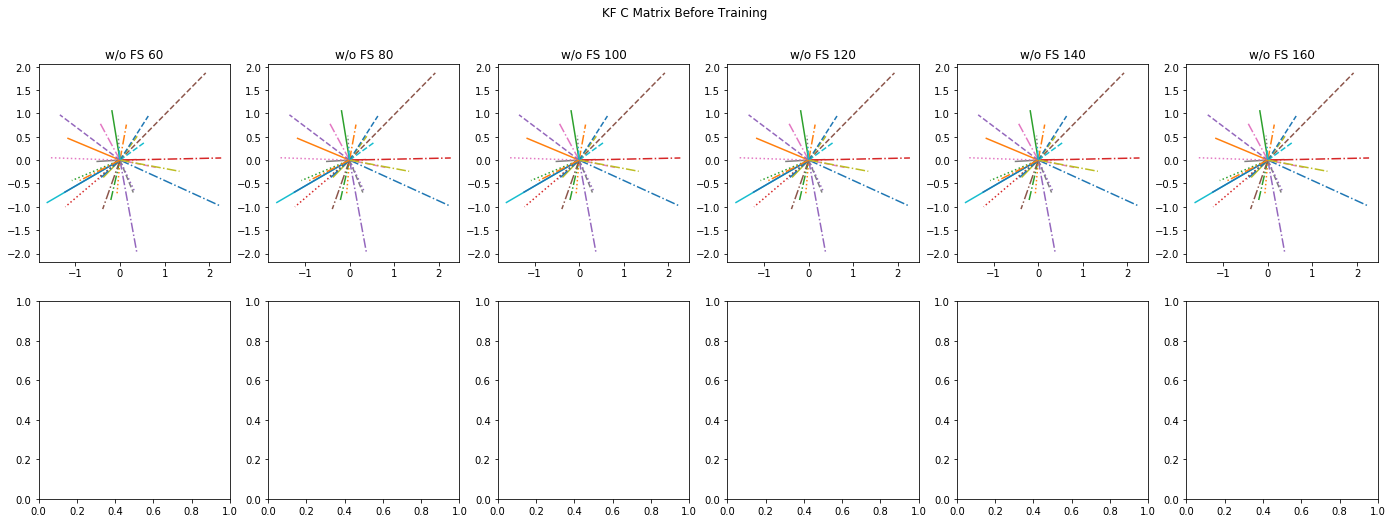

In [22]:
from afs_plotting import plot_prefered_directions

print('we replace the encoder using the weights')
print('assume, they are all randomly initialized get the first decoder')
print('get a handle to the first decoder')
first_decoder = exps_np[0].decoder
target_C = first_decoder.filt.C
target_Q = np.copy(first_decoder.filt.Q)

print()
diag_val = 5000
np.fill_diagonal(target_Q, diag_val)

#replace the decoder
for i,e in enumerate(exps):
    weights.change_target_kalman_filter_with_a_C_mat(e.decoder.filt, target_C, 
                                                     Q= target_Q, debug=False)
    #e.select_decoder_features(e.decoder)
    e.record_feature_active_set(e.decoder)
    
print('we check the new decoder C matrix:')

figure_decoder_C, axs_decoder_C = plt.subplots(nrows=2, 
                               ncols=NUM_EXP, figsize = [GLOBAL_FIGURE_VERTICAL_SIZE * NUM_EXP, GLOBAL_FIGURE_VERTICAL_SIZE * 2],squeeze = False)
figure_decoder_C.suptitle('KF C Matrix Before Training ')

for i,e in enumerate(exps):
    C = e.decoder.filt.C
    plot_prefered_directions(C, ax = axs_decoder_C[0,i])
    axs_decoder_C[0,i].set_title(exp_conds[i])

# Experiment run: assemble into a complete loop

##  define the function

In [23]:
#make this into a loop



def run_exp_loop(exp,  **kwargs):
        # riglib.experiment: line 597 - 601
    #exp.next_trial = next(exp.gen)
    # -+exp._parse_next_trial()np.arraynp.array


    # we need to set the initial state
    # per fsm.run:  line 138


    # Initialize the FSM before the loop
    exp.set_state(exp.state)
    
    finished_trials = exp.calc_state_occurrences('wait')
    print(f'finished: {finished_trials}')


    while exp.state is not None:

        # exp.fsm_tick()

        ### Execute commands#####
        exp.exec_state_specific_actions(exp.state)

        ###run the bmi loop #####
        # _cycle

        # bmi feature extraction, eh
        #riglib.bmi: 1202
        feature_data = exp.get_features()

        # Determine the target_state and save to file
        current_assist_level = exp.get_current_assist_level()
        target_state = exp.get_target_BMI_state(exp.decoder.states)

        # Determine the assistive control inputs to the Decoder
        #update assistive control level
        exp.update_level()
        if np.any(current_assist_level) > 0:
            current_state = exp.get_current_state()

            if target_state.shape[1] > 1:
                assist_kwargs = exp.assister(current_state, 
                                             target_state[:,0].reshape(-1,1), 
                                             current_assist_level, mode= exp.state)
            else:
                assist_kwargs = exp.assister(current_state, 
                                              target_state, 
                                              current_assist_level, 
                                              mode= exp.state)

            kwargs.update(assist_kwargs)
            
        

        # decode the new features
        # riglib.bmi.bmiloop: line 1245
        neural_features = feature_data[exp.extractor.feature_type]
        
        

        # call decoder.
        #tmp = exp.call_decoder(neural_features, target_state, **kwargs)
        neural_obs = neural_features
        learn_flag = exp.learn_flag
        task_state = exp.state

        n_units, n_obs = neural_obs.shape
        # If the target is specified as a 1D position, tile to match
        # the number of dimensions as the neural features
        if np.ndim(target_state) == 1 or (target_state.shape[1] == 1 and n_obs > 1):
            target_state = np.tile(target_state, [1, n_obs])

        decoded_states = np.zeros([exp.bmi_system.decoder.n_states, n_obs])
        update_flag = False

        for k in range(n_obs):
            neural_obs_k = neural_obs[:, k].reshape(-1, 1)
            target_state_k = target_state[:, k]

            # NOTE: the conditional below is *only* for compatibility with older Carmena
            # lab data collected using a different MATLAB-based system. In all python cases,
            # the task_state should never contain NaN values.
            if np.any(np.isnan(target_state_k)):
                task_state = 'no_target'

            #################################
            # Decode the current observation
            #################################
            unselected_decodable_obs, decode = exp.bmi_system.feature_accumulator(
                neural_obs_k)
            
            if exp.is_feature_change():
                #take care of the decoder selection stuff             
                
                decodable_obs = exp.select_features(unselected_decodable_obs)
            else:
                decodable_obs = unselected_decodable_obs.copy()
            
            if decode:  # if a new decodable observation is available from the feature accumulator
                prev_state = exp.bmi_system.decoder.get_state()

                exp.bmi_system.decoder(decodable_obs, **kwargs)
                # Determine whether the current state or previous state should be given to the learner
                if exp.bmi_system.learner.input_state_index == 0:
                    learner_state = exp.bmi_system.decoder.get_state()
                elif exp.bmi_system.learner.input_state_index == -1:
                    learner_state = prev_state
                else:
                    print(("Not implemented yet: %d" %
                           exp.bmi_system.learner.input_state_index))
                    learner_state = prev_state

                if learn_flag:
                    exp.bmi_system.learner(unselected_decodable_obs.copy(), learner_state, target_state_k, exp.bmi_system.decoder.get_state(
                    ), task_state, state_order=exp.bmi_system.decoder.ssm.state_order)

            decoded_states[:, k] = exp.bmi_system.decoder.get_state()

            ############################
            # Update decoder parameters
            ############################
            if exp.bmi_system.learner.is_ready():
                batch_data = exp.bmi_system.learner.get_batch()
                batch_data['decoder'] = exp.bmi_system.decoder
                
                #for feature selection
                unselected_batch = np.copy(batch_data['spike_counts'])
                selected_batch = np.copy(unselected_batch[exp._active_feat_set,:])
                batch_data['spike_counts'] = selected_batch.copy()
                
                kwargs.update(batch_data)
                exp.bmi_system.updater(**kwargs)
                exp.bmi_system.learner.disable()
                
                #measure features. 
                if isinstance(exp, FeatureSelector):
                    exp.measure_features(unselected_batch,
                                       batch_data['intended_kin'])
                

            new_params = None  # by default, no new parameters are available
            if exp.bmi_system.has_updater:
                new_params = copy.deepcopy(exp.bmi_system.updater.get_result())

            # Update the decoder if new parameters are available
            if not (new_params is None):
                exp.bmi_system.decoder.update_params(
                    new_params, **exp.bmi_system.updater.update_kwargs)
                new_params['intended_kin'] = batch_data['intended_kin']
                new_params['spike_counts_batch'] = batch_data['spike_counts']

                exp.bmi_system.learner.enable()
                update_flag = True

                # Save new parameters to parameter history
                exp.bmi_system.param_hist.append(new_params)
                
                #take care of the decoder selection stuff
                if exp.is_decoder_change():
                    #only select the first four neurons
                    print(f'decoder changes here at {exp.cycle_count}')
                    exp.select_decoder_features(exp.decoder, debug = True)
                
                #record the current feature active set
                exp.record_feature_active_set(exp.decoder)


        # saved as task data
        # return decoded_states, update_flag
        tmp = decoded_states
        exp.task_data['internal_decoder_state'] = tmp

        # reset the plant position
        # @riglib.bmi.BMILoop.move_plant  line:1254
        exp.plant.drive(exp.decoder)

        # check state transitions and run the FSM.
        current_state = exp.state

        # iterate over the possible events which could move the task out of the current state
        for event in exp.status[current_state]:
            # if the event has occurred
            if exp.test_state_transition_event(event):
                # execute commands to end the current state
                exp.end_state(current_state)

                # trigger the transition for the event
                exp.trigger_event(event)

                # stop searching for transition events (transition events must be
                # mutually exclusive for this FSM to function properly)
                break

        # sort out the loop params.
        # inc cycle count
        exp.cycle_count += 1

        # save target data as was done in manualControlTasks._cycle
        exp.task_data['target'] = exp.target_location.copy()
        exp.task_data['target_index'] = exp.target_index

        #done in bmi:_cycle after move_plant
        exp.task_data['loop_time'] = exp.iter_time()


        #fb_controller data
        exp.task_data['target_state'] = target_state

        #encoder data
        #input to this is actually extractor
        exp.task_data['ctrl_input'] = np.reshape(exp.extractor.sim_ctrl, (1,-1))

        #actually output
        exp.task_data['spike_counts'] = feature_data['spike_counts']
        exp.k_mat_params.append(np.copy(exp.decoder.filt.K))


        #save the decoder_state
        #from BMILoop.move_plant
        exp.task_data['decoder_state'] = exp.decoder.get_state(shape=(-1,1))
        
        #save bmi_data
        exp.task_data['update_bmi'] = update_flag


        # as well as plant data.
        plant_data = exp.plant.get_data_to_save()
        for key in plant_data:
            exp.task_data[key] = plant_data[key]

        # clda data handled in the above call.

        # save to the list hisory of data.
        exp.task_data_hist.append(exp.task_data.copy())
        
        #deal with the task count_down features
        
        if hasattr(exp, 'TOTAL_RUNNNING_TIME'):
            if exp.cycle_count == exp.total_frames:
                exp.state = None
                print('exit')
        
        #print out the trial update whenever wait count changes, alright. 
        if finished_trials != exp.calc_state_occurrences('wait'):
            finished_trials = exp.calc_state_occurrences('wait')
            print(f'finished trials :{finished_trials} with a current assist level of {exp.get_current_assist_level()}')


    if exp.verbose:
        print("end of FSM.run, task state is", exp.state)
    
    


## actually running the experiments

In [24]:
for i,e in enumerate(exps):
    np.random.seed(1000)
    run_exp_loop(e, **kwargs_exps[i])
    print(f'Finished running  {exp_conds[i]}')
    print()
    print()

runseq
finished: 1
assist_level at final value after 0 successful trials


/home/sijia-aw/BMi3D_my/lab_bmi3d/riglib/bmi/kfdecoder.py:372: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C = np.mat(np.linalg.lstsq(X.T, Y.T)[0].T)


finished trials :2 with a current assist level of 0.0
finished trials :3 with a current assist level of 0.0
finished trials :4 with a current assist level of 0.0
finished trials :5 with a current assist level of 0.0
finished trials :6 with a current assist level of 0.0
finished trials :7 with a current assist level of 0.0
finished trials :8 with a current assist level of 0.0
finished trials :9 with a current assist level of 0.0
finished trials :10 with a current assist level of 0.0
finished trials :11 with a current assist level of 0.0
finished trials :12 with a current assist level of 0.0
finished trials :13 with a current assist level of 0.0
finished trials :14 with a current assist level of 0.0
finished trials :15 with a current assist level of 0.0
finished trials :16 with a current assist level of 0.0
finished trials :17 with a current assist level of 0.0
finished trials :18 with a current assist level of 0.0
finished trials :19 with a current assist level of 0.0
finished trials :2

finished trials :37 with a current assist level of 0.0
finished trials :38 with a current assist level of 0.0
finished trials :39 with a current assist level of 0.0
finished trials :40 with a current assist level of 0.0
finished trials :41 with a current assist level of 0.0
finished trials :42 with a current assist level of 0.0
finished trials :43 with a current assist level of 0.0
finished trials :44 with a current assist level of 0.0
finished trials :45 with a current assist level of 0.0
finished trials :46 with a current assist level of 0.0
finished trials :47 with a current assist level of 0.0
finished trials :48 with a current assist level of 0.0
finished trials :49 with a current assist level of 0.0
finished trials :50 with a current assist level of 0.0
finished trials :51 with a current assist level of 0.0
finished trials :52 with a current assist level of 0.0
finished trials :53 with a current assist level of 0.0
finished trials :54 with a current assist level of 0.0
finished t

finished trials :90 with a current assist level of 0.0
finished trials :91 with a current assist level of 0.0
finished trials :92 with a current assist level of 0.0
finished trials :93 with a current assist level of 0.0
finished trials :94 with a current assist level of 0.0
finished trials :95 with a current assist level of 0.0
finished trials :96 with a current assist level of 0.0
finished trials :97 with a current assist level of 0.0
finished trials :98 with a current assist level of 0.0
finished trials :99 with a current assist level of 0.0
finished trials :100 with a current assist level of 0.0
finished trials :101 with a current assist level of 0.0
finished trials :102 with a current assist level of 0.0
finished trials :103 with a current assist level of 0.0
finished trials :104 with a current assist level of 0.0
finished trials :105 with a current assist level of 0.0
finished trials :106 with a current assist level of 0.0
finished trials :107 with a current assist level of 0.0
fi

finished trials :126 with a current assist level of 0.0
finished trials :127 with a current assist level of 0.0
finished trials :128 with a current assist level of 0.0
finished trials :129 with a current assist level of 0.0
finished trials :130 with a current assist level of 0.0
finished trials :131 with a current assist level of 0.0
finished trials :132 with a current assist level of 0.0
finished trials :133 with a current assist level of 0.0
finished trials :134 with a current assist level of 0.0
finished trials :135 with a current assist level of 0.0
finished trials :136 with a current assist level of 0.0
finished trials :137 with a current assist level of 0.0
exit
end of FSM.run, task state is None
Finished running  w/o FS 140


runseq
finished: 1
finished trials :2 with a current assist level of 0.0
finished trials :3 with a current assist level of 0.0
finished trials :4 with a current assist level of 0.0
finished trials :5 with a current assist level of 0.0
finished trials :6 wit

finished trials :137 with a current assist level of 0.0
finished trials :138 with a current assist level of 0.0
finished trials :139 with a current assist level of 0.0
finished trials :140 with a current assist level of 0.0
finished trials :141 with a current assist level of 0.0
finished trials :142 with a current assist level of 0.0
finished trials :143 with a current assist level of 0.0
finished trials :144 with a current assist level of 0.0
finished trials :145 with a current assist level of 0.0
finished trials :146 with a current assist level of 0.0
finished trials :147 with a current assist level of 0.0
finished trials :148 with a current assist level of 0.0
finished trials :149 with a current assist level of 0.0
exit
end of FSM.run, task state is None
Finished running  w/o FS 160




# Postprocessing the data for loading

## declare defs and conventions

In [25]:
FRAME_RATE = 60
INT_WINDOW_TIME = 10 # s for looking at sample raw data

# some conventions as we go down the loop
X_VEL_STATE_IND = 3
Y_VEL_STATE_IND = 5
X_POS_STATE_IND = 0
Y_POS_STATE_IND = 2

state_indices = [X_POS_STATE_IND,
                 Y_POS_STATE_IND,
                 X_VEL_STATE_IND,
                 Y_VEL_STATE_IND]
state_names = ['x pos ', 'y pos', 'x vel', 'y vel']


INT_WIN_SAMPLES = INT_WINDOW_TIME * FRAME_RATE

## Refactor out the data

In [26]:
task_data_hist_np_all = [np.array(e.task_data_hist) for e in exps]
len(task_data_hist_np_all)
task_data_hist_np_all[0].dtype

dtype([('cursor', '<f8', (3,)), ('obs_t', '<f8', (32, 1)), ('KC', '<f8', (7, 7)), ('pred_state_mean', '<f8', (7, 1)), ('post_state_mean', '<f8', (7, 1)), ('pred_state_P', '<f8', (7, 7)), ('post_state_P', '<f8', (7, 7)), ('loop_time', '<f8', (1,)), ('decoder_state', '<f8', (7, 1)), ('internal_decoder_state', '<f8', (7, 1)), ('target_state', '<f8', (7, 1)), ('update_bmi', '<f8', (1,)), ('spike_counts', '<f8', (32, 1)), ('bin_edges', '<f8', (2,)), ('ctrl_input', '<f8', (7,)), ('assist_level', '<f8', (1,)), ('target', '<f8', (3,)), ('target_index', '<i4', (1,))])

## Finished time in seconds

In [27]:
finished_times_in_seconds = [(len(s)) for s in task_data_hist_np_all]
finished_times_in_seconds

[72000, 72000, 72000, 72000, 72000, 72000]

In [28]:
#calculate how many trials
for e in  exps: print(e.calc_state_occurrences('reward'))
print()

for e in  exps: print(e.calc_trial_num())

51
61
96
112
136
148

117
126
161
181
198
210


# Post data analysis

## Total finished trials

## Overall  trial statistics succuss rate)

Text(0.5, 0, 'Time (s)')

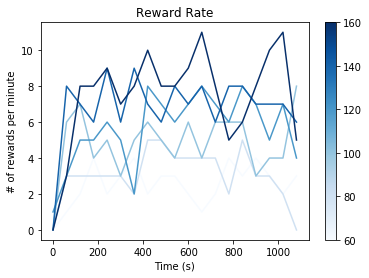

In [49]:
import behaviour_metrics
import importlib
import matplotlib.colors as cm
import matplotlib as mpl

importlib.reload(behaviour_metrics)

window_length = 60 #s

reward_events_per_minute = [behaviour_metrics.calc_event_rate_from_state_log(e.state_log,'reward',window_length = window_length) for e in exps]
reward_events_per_minute = np.array(reward_events_per_minute) * 60 / window_length

import afs_plotting
importlib.reload(afs_plotting)
from afs_plotting import get_cmap

cmap = get_cmap(num_signal_levels)
time_vec = np.arange(reward_events_per_minute.shape[1]) * window_length 


for i in range(num_signal_levels):
    plt.plot(time_vec, reward_events_per_minute[i].T, color = cmap.to_rgba(i+1))
    
cbar = plt.colorbar(cmap)
cbar.ax.set_yticklabels(mean_firing_rate_high)

plt.ylabel('# of rewards per minute')
plt.title('Reward Rate')
plt.xlabel('Time (s)')

## sort into trials

In [30]:
state_log = e.state_log
segmented_trials = behaviour_metrics.segment_trials_in_state_log(state_log)

In [31]:
trial_dicts_all = []
dict_keys = ['cursor', #behaviour
             'ctrl_input', 'spike_counts', #encoder translates intended ctrl into spike counts
             'decoder_state']


for i in range(NUM_EXP):
    
    segmented_trials = behaviour_metrics.segment_trials_in_state_log(exps[i].state_log)

    task_data_hist_np = task_data_hist_np_all[i]
    trial_dict_0 = behaviour_metrics.sort_trials_use_segmented_log(segmented_trials, 
                               target_seq,
                               task_data_hist_np, dict_keys)
    
    trial_dicts_all.append(trial_dict_0)

for t in trial_dicts_all: print(len(t))

117
126
161
181
198
210


# Behaviour  analyses

## Trajectory analysis

In [32]:
import afs_plotting
importlib.reload(afs_plotting)

<module 'afs_plotting' from '/home/sijia-aw/BMi3D_my/operation_funny_chicken/adaptive_feature_selection/afs_plotting.py'>

## Variance analysis

In [34]:
importlib.reload(behaviour_metrics)

from behaviour_metrics import calc_arc_length_from_cursor

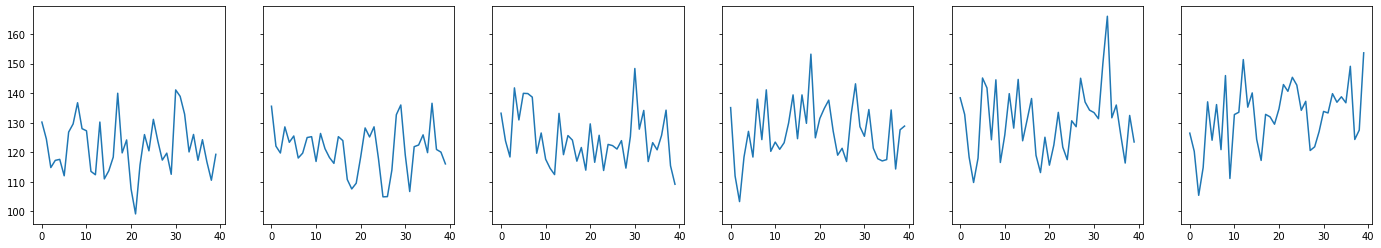

In [35]:
arc_len = [calc_arc_length_from_cursor(t['cursor'], window = window_length) for t in task_data_hist_np_all]
arc_len =  np.array(arc_len)

fig, axes = plt.subplots(1,NUM_EXP, figsize = (NUM_EXP * GLOBAL_FIGURE_VERTICAL_SIZE,
                                               GLOBAL_FIGURE_VERTICAL_SIZE), sharey = True)

for i,al in enumerate(arc_len): 
    axes[i].plot(al)

Text(0.5, 0, 'Time (s)')

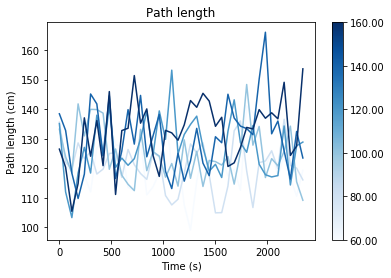

In [50]:
time_vec = np.arange(arc_len.shape[1]) * window_length 
from afs_plotting import get_cmap

cmap = get_cmap(num_signal_levels)

for i in range(num_signal_levels):
    plt.plot(time_vec, arc_len[i].T, color = cmap.to_rgba(i+1))
    
cbar = plt.colorbar(cmap)
cbar.ax.set_yticklabels(signal_labels)

plt.ylabel('Path length (cm)')
plt.title('Path length')
plt.xlabel('Time (s)')

# Kalman filter

## encoder

the job of the encoder is to directly encode intention into firing rates
the direct measure is just pearson correlation coefficients between 
the intentions and the firing rates

## decoder

steady state tuning curves:


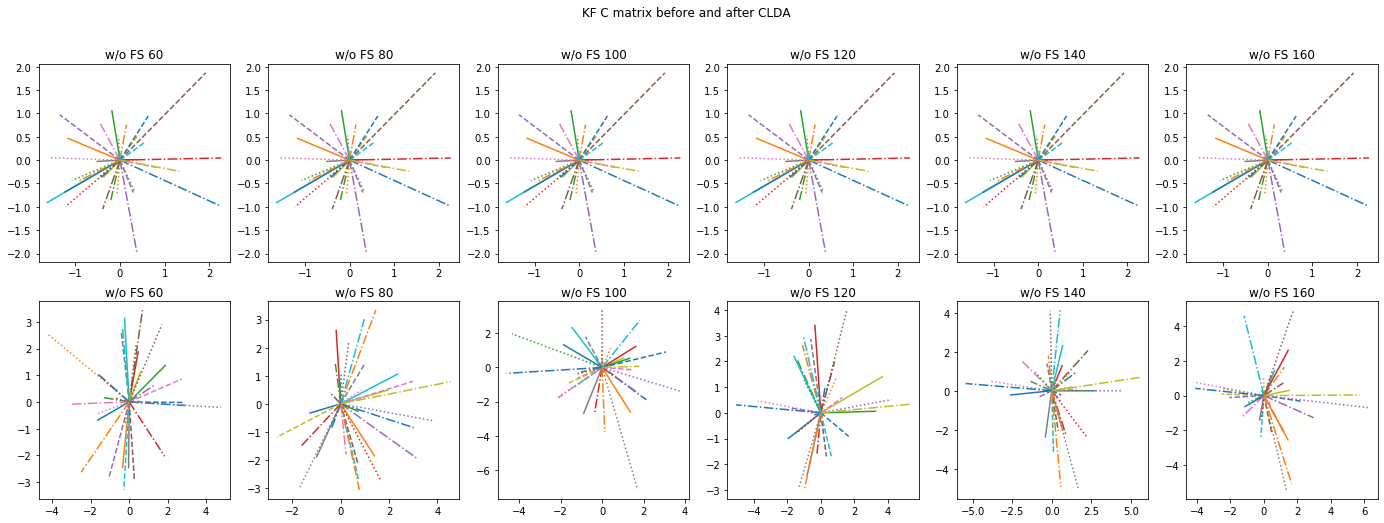

In [37]:
from afs_plotting import plot_prefered_directions

TEXT_OFFSET_VERTICAL = -0.2


figure_decoder_C.suptitle('KF C matrix before and after CLDA')

print('steady state tuning curves:')

for  i,e in enumerate(exps): 

    e = exps[i]
    C = e.decoder.filt.C

    plot_prefered_directions(C, ax = axs_decoder_C[1,i])
    axs_decoder_C[1,i].set_title(f'{exp_conds[i]}')

figure_decoder_C

## Decoder compared to the encoder



[Text(1, 0, '60.00'),
 Text(1, 0, '80.00'),
 Text(1, 0, '100.00'),
 Text(1, 0, '120.00'),
 Text(1, 0, '140.00'),
 Text(1, 0, '160.00')]

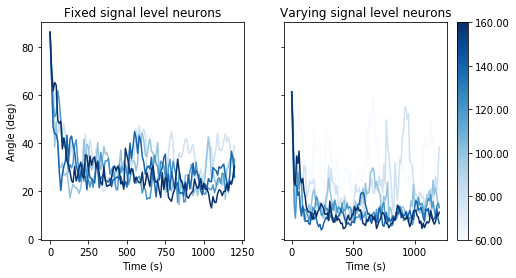

In [62]:
import matplotlib.cm as cm

import convergence_analysis
importlib.reload(convergence_analysis)
from convergence_analysis import calc_cosine_sim_bet_two_matrices, calc_cosine_to_target_matrix


figure_C, axes_C = plt.subplots(1,2, figsize = (2 * GLOBAL_FIGURE_VERTICAL_SIZE, 
                                               GLOBAL_FIGURE_VERTICAL_SIZE),
                               sharey = True)

time_vec = np.arange(0, total_exp_time + 1, batch_size * 0.1, ) 


cmap = get_cmap(num_signal_levels)

for i,e in enumerate(exps):
    enc_directions = e.encoder.C
    dec_directions = np.array(e._used_C_mat_list)
    

    angles_hist = calc_cosine_to_target_matrix( dec_directions,enc_directions)
    

    active_angles = np.mean(angles_hist[:, noise_neuron_list], axis = 1)
    axes_C[0].plot(time_vec, active_angles, color = cmap.to_rgba(i+1))
    
    
    active_angles = np.mean(angles_hist[:, no_noise_neuron_list], axis = 1)
    axes_C[1].plot(time_vec, active_angles, color = cmap.to_rgba(i+1))

    
axes_C[0].set_ylabel('Angle (deg)')
axes_C[0].set_title(f'Fixed signal level neurons')
axes_C[0].set_xlabel('Time (s)')
axes_C[1].set_xlabel('Time (s)')
axes_C[1].set_title('Varying signal level neurons')


cbar = plt.colorbar(cmap)
cbar.ax.set_yticklabels(signal_labels)


## looking at K matrix

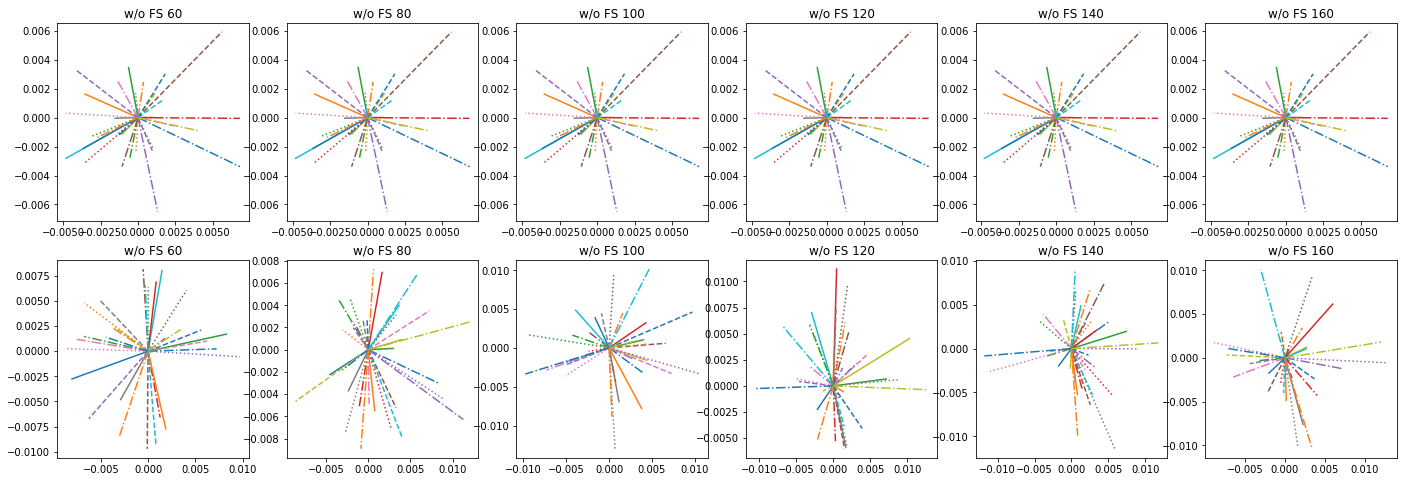

In [39]:
figure_k_matrix, axes_k_matrix = plt.subplots(2,NUM_EXP,
                                          figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * NUM_EXP,
                                                    GLOBAL_FIGURE_VERTICAL_SIZE * 2))

for i,e in enumerate(exps):
    K = (e._used_K_mat_list[1]).T

    plot_prefered_directions(K, ax  = axes_k_matrix[0, i])
    axes_k_matrix[0, i].set_title(exp_conds[i])

for i,e in enumerate(exps):
    K = (e._used_K_mat_list[-1]).T
    plot_prefered_directions(K, ax  = axes_k_matrix[1, i])
    axes_k_matrix[1,i].set_title(exp_conds[i])

(32, 7)
(120, 32, 7)
(32, 7)
(120, 32, 7)
(32, 7)
(120, 32, 7)
(32, 7)
(120, 32, 7)
(32, 7)
(120, 32, 7)
(32, 7)
(120, 32, 7)


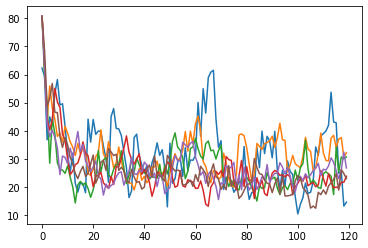

In [40]:
for i,e in enumerate(exps):
    
    enc_directions = e.encoder.C
    
    print(enc_directions.shape)
    K_mat = np.array(e._used_K_mat_list[1:])
    
    K_mat = np.swapaxes(K_mat, 1,2)
    print(K_mat.shape)
    
    if i == 0:
        angles_hist = calc_cosine_to_target_matrix(K_mat[:, no_noise_neuron_list,:], 
                                                   enc_directions[no_noise_neuron_list,:])
    else:
        angles_hist = calc_cosine_to_target_matrix(K_mat, enc_directions[e._active_feat_set,:])
    

    active_angles = np.mean(angles_hist, axis = 1)
    plt.plot(active_angles)

# Feature analysis

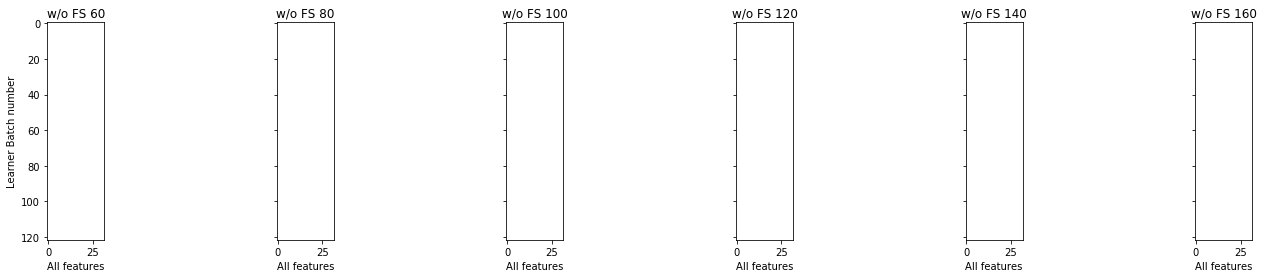

In [41]:
from matplotlib import colors



fig_feature_active_map, axes_feat_active_map = plt.subplots(1, NUM_EXP,
                                                            figsize = ( NUM_EXP * GLOBAL_FIGURE_VERTICAL_SIZE,
                                                                      GLOBAL_FIGURE_VERTICAL_SIZE),
                                                           sharey = True)
axes_feat_active_map[0].set_ylabel('Learner Batch number')

#color true to yellow
cmap = colors.ListedColormap(['white'])

for i, exp in enumerate(exps):

    active_feat_heat_map = np.array(exp._active_feat_set_list, dtype = np.int32)
    
    #https://stackoverflow.com/questions/40985961/matplotlib-how-to-change-data-point-color-based-on-its-boolean-value-consisten
    active_feat_heat_map = np.ma.masked_where(active_feat_heat_map == False, active_feat_heat_map)
    
    a = axes_feat_active_map[i].imshow(active_feat_heat_map, cmap = cmap)
    
    #color false to blue
    cmap.set_bad(color='black')
    
    axes_feat_active_map[i].set_xlabel('All features')
    axes_feat_active_map[i].set_title(exp_conds[i])


#fig_feature_active_map.colorbar(a, ax=axes_feat_active_map.ravel().tolist())

## Examine used K mat

6


[Text(1, 0, '60.00'),
 Text(1, 0, '80.00'),
 Text(1, 0, '100.00'),
 Text(1, 0, '120.00'),
 Text(1, 0, '140.00'),
 Text(1, 0, '160.00')]

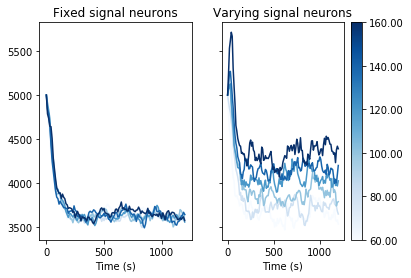

In [61]:
fig_Q, axes_Q = plt.subplots(1,2, sharey = True)

cmap_q = get_cmap(num_signal_levels)

print(num_signal_levels)
for i,exp in enumerate(exps):

    Q_list = np.array(exp._used_Q_diag_list)

    time_points = Q_list.shape[0]

    Q_diag_list = []

    for j in range(time_points):
        Q_slice = np.diag(Q_list[j,:,:])
        Q_diag_list.append(Q_slice)

    Q_diag_list = np.array(Q_diag_list)
    
    
    Q_diag_noise = np.mean(Q_diag_list[:, noise_neuron_list], axis = 1)
    Q_diag_no_noise = np.mean(Q_diag_list[:, no_noise_neuron_list], axis = 1)
    
    axes_Q[0].plot(time_vec, Q_diag_noise, color = cmap_q.to_rgba(i+1))
    axes_Q[1].plot(time_vec, Q_diag_no_noise, color = cmap_q.to_rgba(i+1))

axes_Q[0].set_xlabel('Time (s)')
axes_Q[1].set_xlabel('Time (s)')

axes_Q[0].set_title('Fixed signal neurons')
axes_Q[1].set_title('Varying signal neurons')

cbar = plt.colorbar(cmap)
cbar.ax.set_yticklabels(signal_labels)

## examine used C mat

(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)


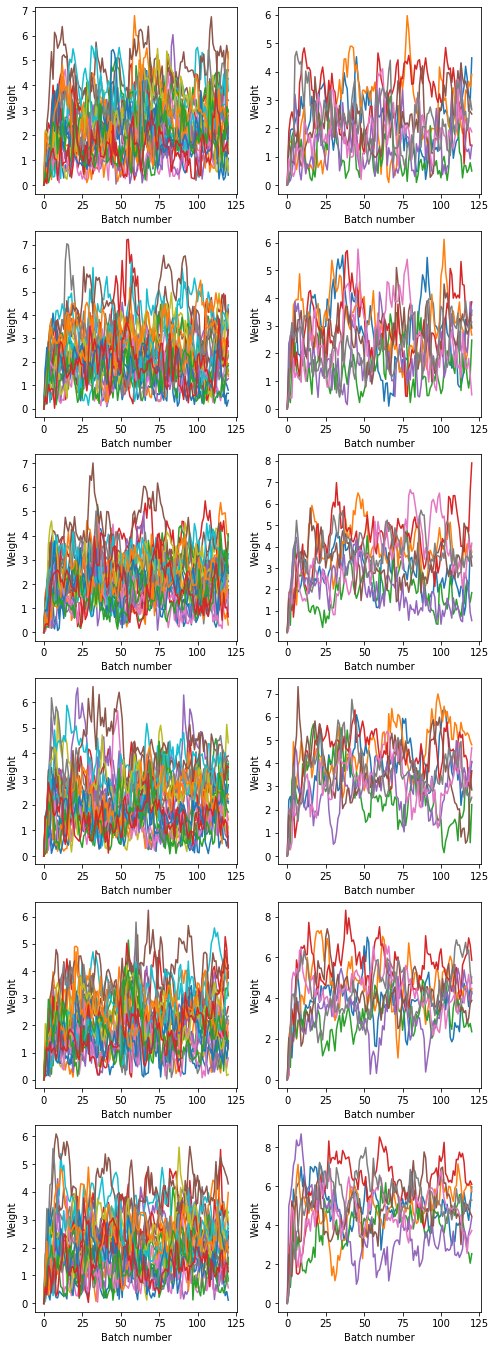

In [42]:
import weights_linear_regression
importlib.reload(weights_linear_regression)
from weights_linear_regression import calc_a_history_of_matrix_L2norms_along_first_axis


figure_weights_norm, axes_weights_norm = plt.subplots( NUM_EXP, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, NUM_EXP * GLOBAL_FIGURE_VERTICAL_SIZE))

C_mat_all = list()

for j,exp in enumerate(exps):
    
    updated_C_mat = np.array(exp._used_C_mat_list)
    the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(updated_C_mat, debug = False)

    C_mat_all.append(np.copy(updated_C_mat))
    axe_exp = axes_weights_norm[j,:]
    for i,a in enumerate(axe_exp):
        a.plot(the_history_of_KF_weights_in_time_by_neurons[:, neuron_type_indices_in_a_list[i]])
        a.set_xlabel('Batch number')
        a.set_ylabel('Weight')
        
C_mat_all = np.array(C_mat_all)

(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)


Text(0.5, 1.0, 'Varying  signal Neurons')

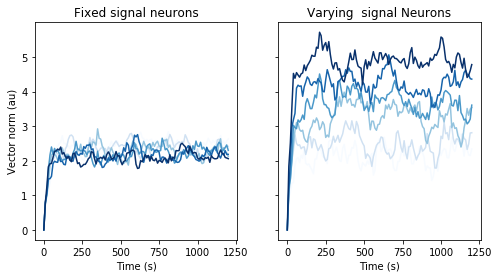

In [64]:
fig_compr_means, axes_compr_means = plt.subplots(1, N_TYPES_OF_NEURONS,
                                                figsize = (GLOBAL_FIGURE_VERTICAL_SIZE * N_TYPES_OF_NEURONS,
                                                          GLOBAL_FIGURE_VERTICAL_SIZE),
                                                sharey = True)

cmap = get_cmap(num_signal_levels)


for i,C in enumerate(C_mat_all):


    the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(C,
                                                            indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))



    time_vec = np.arange(the_history_of_KF_weights_in_time_by_neurons.shape[0]) * 10
    
    noise_mean = np.mean(the_history_of_KF_weights_in_time_by_neurons[:,noise_neuron_list], axis = 1)
    #std = np.std(the_history_of_KF_weights_in_time_by_neurons[:,selected_neurons], axis = 1)

    line = axes_compr_means[0].plot(time_vec, noise_mean, color = cmap.to_rgba(i+1))
    
    non_noise_mean = np.mean(the_history_of_KF_weights_in_time_by_neurons[:,no_noise_neuron_list], axis = 1)

    line = axes_compr_means[1].plot(time_vec, non_noise_mean, color = cmap.to_rgba(i+1))
    
        
        #a.fill_between(x_data ,selected_mean - std, selected_mean + std, alpha = 0.1 )
        #a.legend(exp_conds)
        
handles, labels = a.get_legend_handles_labels()

axes_compr_means[0].set_ylabel('Vector norm (au)')
axes_compr_means[0].set_xlabel('Time (s)')
axes_compr_means[1].set_xlabel('Time (s)')

axes_compr_means[0].set_title('Fixed signal neurons')
axes_compr_means[1].set_title('Varying  signal Neurons')

## Fit to the begining for non feature selected

(32, 7)


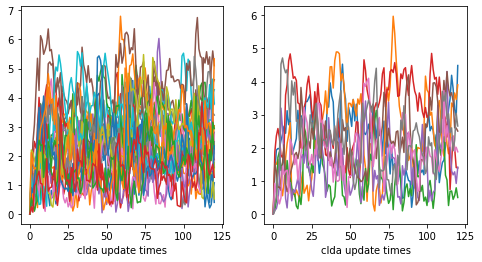

In [44]:
# now, we can average over the neurons. 
from weights_linear_regression import calc_a_history_of_matrix_L2norms_along_first_axis

figure_weights_norm, axes_weights_norm = plt.subplots( 1, N_TYPES_OF_NEURONS,
    figsize = (N_TYPES_OF_NEURONS * GLOBAL_FIGURE_VERTICAL_SIZE, GLOBAL_FIGURE_VERTICAL_SIZE))


kf_C = np.copy(exps[0]._used_C_mat_list)

the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(kf_C, 
                                                                        indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))


for i,a in enumerate(axes_weights_norm):
    a.plot(the_history_of_KF_weights_in_time_by_neurons[:,
                                                        neuron_type_indices_in_a_list[i]])
    a.set_xlabel('clda update times')
    

/home/sijia-aw/BMi3D_my/operation_funny_chicken/adaptive_feature_selection/convergence_analysis.py:126: RuntimeWarning: overflow encountered in exp
  return a*(1-np.exp(-b*x))


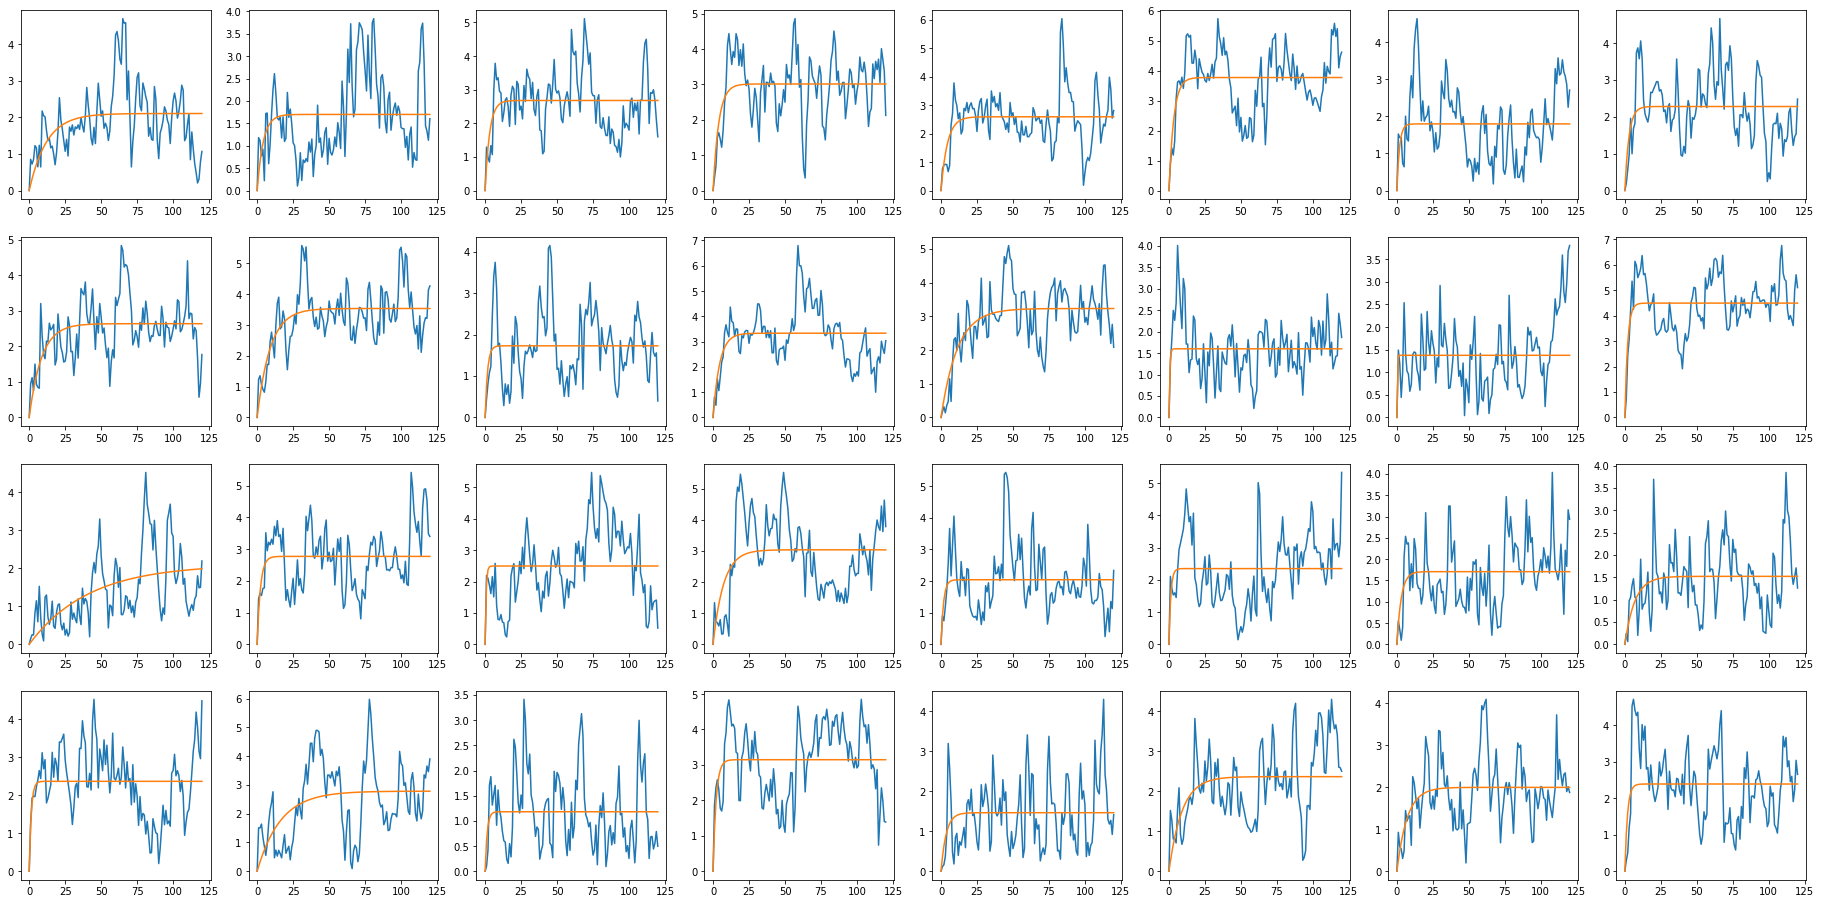

In [45]:
from convergence_analysis import ExpFitAnalyzer, calc_flipped_shifted_exponential

#calculate this across neurons
exp_fit_analyzer = ExpFitAnalyzer()

fig_fit, ax_fit = plt.subplots(4,8, figsize = (32,16))

unfitted_list = list()
fitting_params = list()


x_data = np.arange(the_history_of_KF_weights_in_time_by_neurons.shape[0])

for i,ax in enumerate(ax_fit.flat):
    kf_series_temp = the_history_of_KF_weights_in_time_by_neurons[:,i]
    
    try:
    
        (fitting_param_temp, var) = exp_fit_analyzer.calc_fitting_params(calc_flipped_shifted_exponential, x_data, kf_series_temp)
        
        exp_fit_analyzer.calc_estimated_y()
        exp_fit_analyzer.plot_fitting(ax)
    
    except:
        unfitted_list.append(i)
        fitting_param_temp = np.array([0, 0])
        
    fitting_params.append(fitting_param_temp)
    

In [46]:
fitting_params = np.array(fitting_params)
fitting_params

array([[ 2.11,  0.08],
       [ 1.7 ,  0.24],
       [ 2.68,  0.32],
       [ 3.01,  0.25],
       [ 2.59,  0.23],
       [ 3.77,  0.3 ],
       [ 1.8 ,  0.57],
       [ 2.28,  0.36],
       [ 2.64,  0.12],
       [ 3.54,  0.11],
       [ 1.73,  0.61],
       [ 3.33,  0.22],
       [ 3.23,  0.09],
       [ 1.6 ,  2.04],
       [ 1.37, 15.8 ],
       [ 4.49,  0.53],
       [ 2.1 ,  0.02],
       [ 2.77,  0.45],
       [ 2.5 ,  1.51],
       [ 3.04,  0.14],
       [ 2.04,  0.58],
       [ 2.35,  0.8 ],
       [ 1.71,  0.33],
       [ 1.52,  0.14],
       [ 2.37,  0.73],
       [ 2.78,  0.06],
       [ 1.18,  0.72],
       [ 3.15,  0.47],
       [ 1.46,  0.28],
       [ 2.37,  0.11],
       [ 2.  ,  0.14],
       [ 2.39,  0.57]])

In [47]:
fitting_params_all_exps = list()

for e in exps:

    kf_C = np.copy(e._used_C_mat_list)

    the_history_of_KF_weights_in_time_by_neurons = calc_a_history_of_matrix_L2norms_along_first_axis(kf_C, 
                                                                            indices_to_sum=(X_VEL_STATE_IND, Y_VEL_STATE_IND))

    x_data = np.arange(the_history_of_KF_weights_in_time_by_neurons.shape[0])
    
    fitting_params = []

    for i in range(N_NEURONS):
        kf_series_temp = the_history_of_KF_weights_in_time_by_neurons[:,i]

        try:

            (fitting_param_temp, var) = exp_fit_analyzer.calc_fitting_params(calc_flipped_shifted_exponential, x_data, kf_series_temp)

        except:
            unfitted_list.append(i)
            fitting_param_temp = np.array([0, 0])

        fitting_params.append(fitting_param_temp)
    
    #processing
    fitting_params = np.array(fitting_params)
    fitting_params_all_exps.append(fitting_params)

len(fitting_params_all_exps)

(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)


/home/sijia-aw/BMi3D_my/lib/python3.8/site-packages/scipy/optimize/minpack.py:807: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/sijia-aw/BMi3D_my/operation_funny_chicken/adaptive_feature_selection/convergence_analysis.py:126: RuntimeWarning: overflow encountered in multiply
  return a*(1-np.exp(-b*x))


6

In [48]:
fit_params 

NameError: name 'fit_params' is not defined